# ECMWF OPERATIONAL FORECAST TRACKS

The `TCForecast` class extends the `TCTracks` class with methods to download operational ECMWF ensemble tropical storm track forecasts, read the BUFR files they're contained in and produce a `TCTracks` object that can be used to generate `TropCyclone` hazard footprints.

ECMWF publishes ensemble forecasts for tropical storms multiple times a day. Each is stored in a BUFR file containing encoded information on the storm's location, wind speed, central pressure and other variables (when they exist for that ensemble member). Together, all the ensemble members provide a great probabilistic view of how tropical storms may develop over the coming days.

Downloading the latest ECMWF data and to create a `TCTracks` is straightforward:

In [1]:
from climada.hazard import TCForecast
import logging
import datetime

logging.getLogger('climada.hazard.tc_tracks_forecast').setLevel(logging.WARNING)
print("Processing ECMWF forecast. Date: " + str(datetime.datetime.now()))

forecast = TCForecast()
forecast.fetch_ecmwf()

ImportError: dlopen(/Users/chrisfairless/opt/anaconda3/lib/python3.7/site-packages/cartopy/_crs.cpython-37m-darwin.so, 2): Library not loaded: /usr/local/opt/proj/lib/libproj.19.dylib
  Referenced from: /Users/chrisfairless/opt/anaconda3/lib/python3.7/site-packages/cartopy/_crs.cpython-37m-darwin.so
  Reason: image not found

This has created a `TCTracks` object that works the same way as, for example, tracks read from IBTrACS. We can visualise them:

<GeoAxesSubplot:>

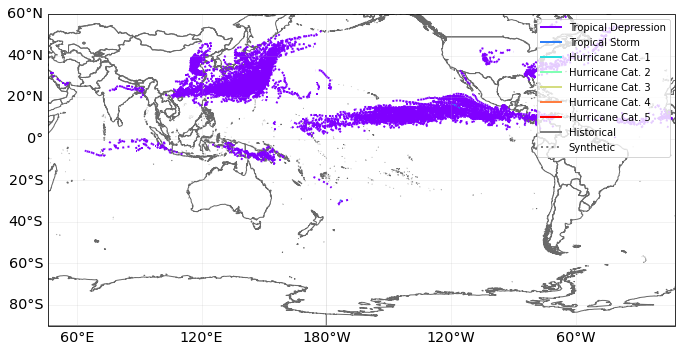

In [3]:
forecast.plot()

The `TCForecast` class can also read from already-downloaded BUFR files, with the `file` and `path` parameters in its `fetch_ecmwf` method. See the documentation for how to use these.

This is especially useful if you're setting up automated cron jobs, where the computing environment may need you to separate the downloads from the file processing.

You can save operational products to the local machine by using the `TCForeacst.fetch_bufr_ftp` method and providing the `target_dir` parameter. Otherwise they are saved as temporary files. See the method documentation for more details.

You can also process past operational products by using the `TCForeacst.fetch_bufr_ftp` method and providing the `remote_dir` parameter with the format `yyyymmddhhmmss`, e.g. `'20200730120000'`.  See the method documentation for more details. The ECMWF ftp server keeps operational products going back about six months (though due to changes in BUFR formatting, not all of them are guaranteed to be readable - see the next section).

### Working with the BUFR format

This should be enough for you to work with ECMWF tropical storm forecasts. This section is for people who want/need to modify the code.

Unfortunately, the BUFR file format is a nightmare to work with. If you're lucky, you'll never need to interact with it, and these scripts will do all the work for you.

This isn't anyone's fault: it's a very old format that prioritises compact information storage over human readability. BUFR files are binary-encoded, and can be read with the ECMWF ecCodes package (amongst other options). Once decoded they're *still* not human readable, and consist of long strings of alphanumeric codes without the necessary metadata to decode them. See [Bufr Format in a Nutshell](https://confluence.ecmwf.int/download/attachments/31064617/ecCodes_BUFR_in_a_nutshell.pdf) for a not-very-helpful overview of the format.

### Troubleshooting

Usually if something stops working it's because ECMWF have made a change to the BUFR format. (Note that this makes the code here incompatible with older operational forecast files. CLIMADA version 2.2.0 contains code to work with BUFR version 35 if you need it).

Since the code here uses ECMWF's own ecCodes package to read in files, some updates to the BUFR


We've comment the code so that the next time it breaks it'll be easier to fix.

If you're unlucky and have to fix these scripts, there are a few things that helped us last time.

- [Information on changes to the BUFR format](https://confluence.ecmwf.int/display/FCST/Changes+to+the+forecasting+system): go here first if something breaks! It also tells you about upcoming changes: in theory we can prepare for them!

- [Sample ECMWF FORTRAN and python code for reading TC tracks from BUFR files](https://confluence.ecmwf.int/display/ECC/bufr_read_tropical_cyclone): this guided the current code. Check its publication date to make sure it works with the latest BUFR formatting!

- [Visualisations of current tropical cyclone forecasts](https://www.ecmwf.int/en/forecasts/charts/tcyclone/): for each storm you can see which ensemble members have tracks present, see them on a map, and check that the `TCForecast` tracks match.